In [215]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set the style for better visualizations
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

###Importing dataset

In [216]:

df=pd.read_csv("dataset.csv")

# This dataset is sourced from an E-Commerce website and provides insights into user behavior on the platform.

In [217]:
df.head()

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO
0,2562691,663791,168,MPD,Dhaka,android,normal,25.0,6/26/2019 9:20,6/26/2019 3:30,No,Yes,NaN,No
1,2561859,961083,240,MPD,Dhaka,mobile-site,normal,35.0,6/25/2019 19:05,6/25/2019 13:40,No,Yes,NaN,No
2,2561434,848517,120,MPD,Dhaka,desktop,normal,35.0,6/25/2019 15:28,6/25/2019 9:27,No,Yes,NaN,Yes
3,2561202,276304,185,MPD,Dhaka,android,normal,25.0,6/25/2019 13:27,6/25/2019 7:27,Yes,No,NaN,No
4,2561033,955384,201,MPD,Dhaka,android,normal,25.0,6/25/2019 12:13,6/25/2019 6:56,No,Yes,NaN,No


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OrderId                    10000 non-null  int64  
 1   UserId                     10000 non-null  int64  
 2   OrderValue                 10000 non-null  int64  
 3   PaymentType                10000 non-null  object 
 4   District                   10000 non-null  object 
 5   OrderSource                10000 non-null  object 
 6   OrderType                  9583 non-null   object 
 7   DeliveryCharge             9999 non-null   float64
 8   OrderPlacedDay             10000 non-null  object 
 9   OrderConfirmDayOverPhone   10000 non-null  object 
 10  IsCartOrder                10000 non-null  object 
 11  OrderFromPromotionalEvent  10000 non-null  object 
 12   courierService            0 non-null      float64
 13  isRTO                      10000 non-null  obje

In [219]:
df.isnull().sum()


OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      417
DeliveryCharge                   1
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64

In [220]:
null_counts = df.isnull().sum()
print("Missing values:\n", null_counts[null_counts > 0])



Missing values:
 OrderType             417
DeliveryCharge          1
 courierService     10000
dtype: int64


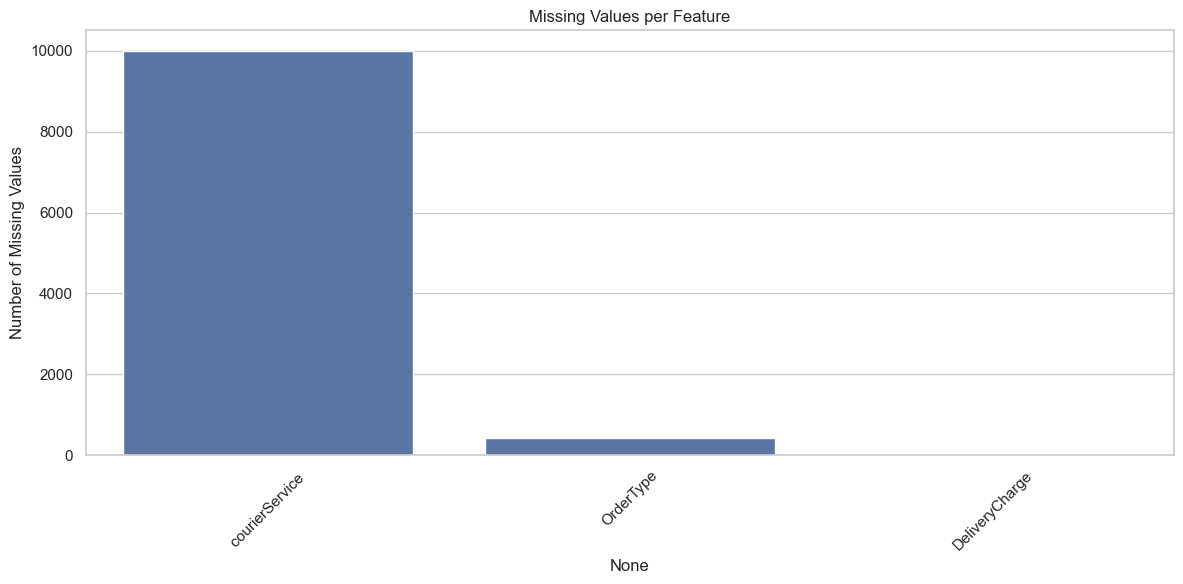

In [221]:

null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Feature')
plt.tight_layout()
plt.show()

In [222]:
print(df.describe(include='all'))

             OrderId         UserId   OrderValue           PaymentType  \
count   1.000000e+04   10000.000000  10000.00000                 10000   
unique           NaN            NaN          NaN                     7   
top              NaN            NaN          NaN  MPD                    
freq             NaN            NaN          NaN                  8553   
mean    2.539235e+06  760484.345100    336.97160                   NaN   
std     9.560667e+03  244170.093658    435.38002                   NaN   
min     2.522672e+06      83.000000      0.00000                   NaN   
25%     2.531893e+06  616375.750000    160.00000                   NaN   
50%     2.538966e+06  883312.000000    230.00000                   NaN   
75%     2.546397e+06  950553.000000    386.25000                   NaN   
max     2.562691e+06  961083.000000  12800.00000                   NaN   

       District OrderSource OrderType  DeliveryCharge   OrderPlacedDay  \
count     10000       10000      9583

In [223]:

df_cleaned = df.dropna()

print("\nAfter cleaning:\n", df_cleaned.isnull().sum().sum(), "missing values remain.")



After cleaning:
 0 missing values remain.


In [224]:
df.isnull().sum()


OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      417
DeliveryCharge                   1
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64

In [225]:
print("Missing values before cleaning:\n", df.isnull().sum())


df_cleaned = df.dropna()


print("\nMissing values after cleaning:\n", df_cleaned.isnull().sum())
print(f"\nOriginal shape: {df.shape}, After cleaning: {df_cleaned.shape}")

Missing values before cleaning:
 OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      417
DeliveryCharge                   1
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64

Missing values after cleaning:
 OrderId                      0
UserId                       0
OrderValue                   0
PaymentType                  0
District                     0
OrderSource                  0
OrderType                    0
DeliveryCharge               0
OrderPlacedDay               0
OrderConfirmDayOverPhone     0
IsCartOrder                  0
OrderFromPromotionalEvent    0
 courierService              0
isRTO                       

In [226]:
df = df[df["OrderType"].notnull()]

In [227]:
df = df[df["DeliveryCharge"].notnull()]

In [228]:
df.isnull().sum()


OrderId                         0
UserId                          0
OrderValue                      0
PaymentType                     0
District                        0
OrderSource                     0
OrderType                       0
DeliveryCharge                  0
OrderPlacedDay                  0
OrderConfirmDayOverPhone        0
IsCartOrder                     0
OrderFromPromotionalEvent       0
 courierService              9582
isRTO                           0
dtype: int64

In [229]:
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower) & (df[feature] <= upper)]
    return df


Data visualization

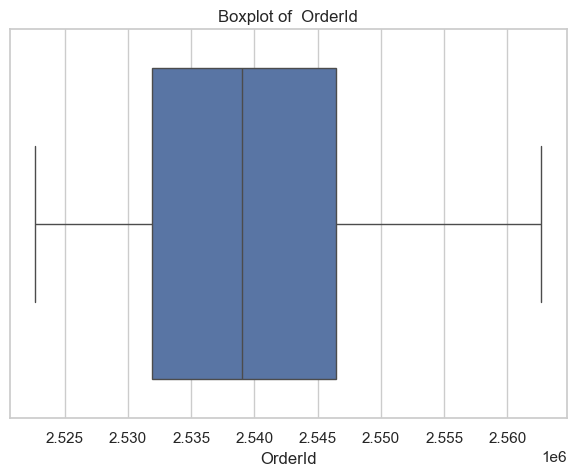

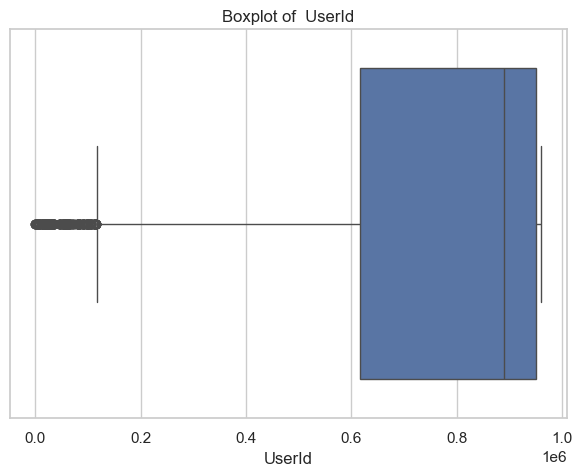

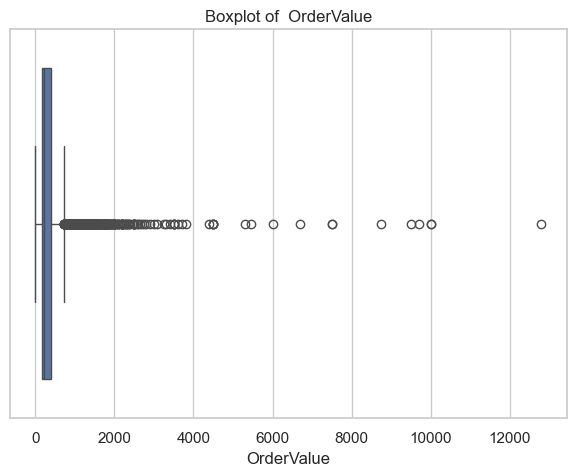

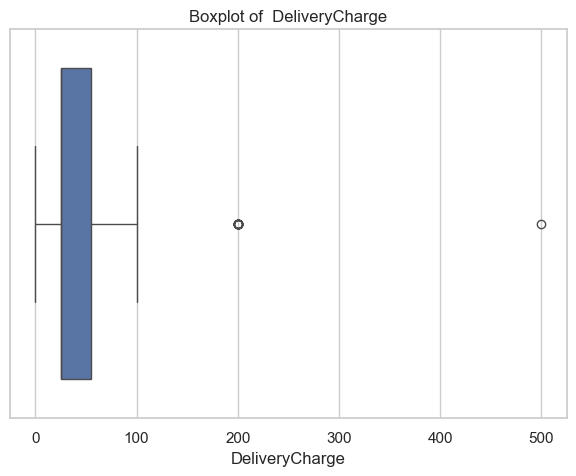

ValueError: List of boxplot statistics and `positions` values must have same the length

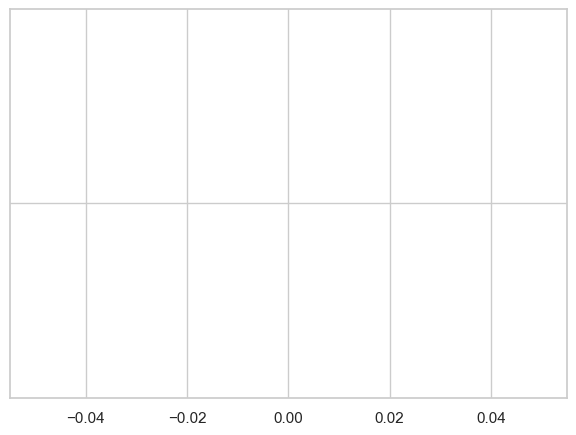

In [230]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_features:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of  {col}')
    plt.show()

In [142]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9582 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OrderId                    9582 non-null   int64  
 1   UserId                     9582 non-null   int64  
 2   OrderValue                 9582 non-null   int64  
 3   PaymentType                9582 non-null   object 
 4   District                   9582 non-null   object 
 5   OrderSource                9582 non-null   object 
 6   OrderType                  9582 non-null   object 
 7   DeliveryCharge             9582 non-null   float64
 8   OrderPlacedDay             9582 non-null   object 
 9   OrderConfirmDayOverPhone   9582 non-null   object 
 10  IsCartOrder                9582 non-null   object 
 11  OrderFromPromotionalEvent  9582 non-null   object 
 12   courierService            0 non-null      float64
 13  isRTO                      9582 non-null   object 
dt

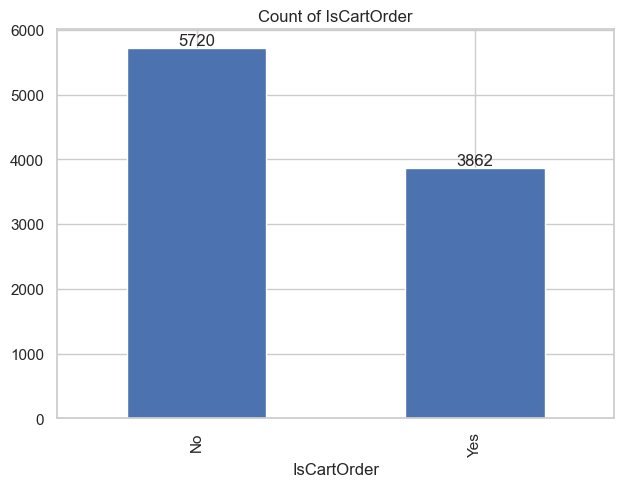

In [144]:
counts = df['IsCartOrder'].value_counts()
counts.plot(kind='bar')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Count of IsCartOrder')
plt.show()



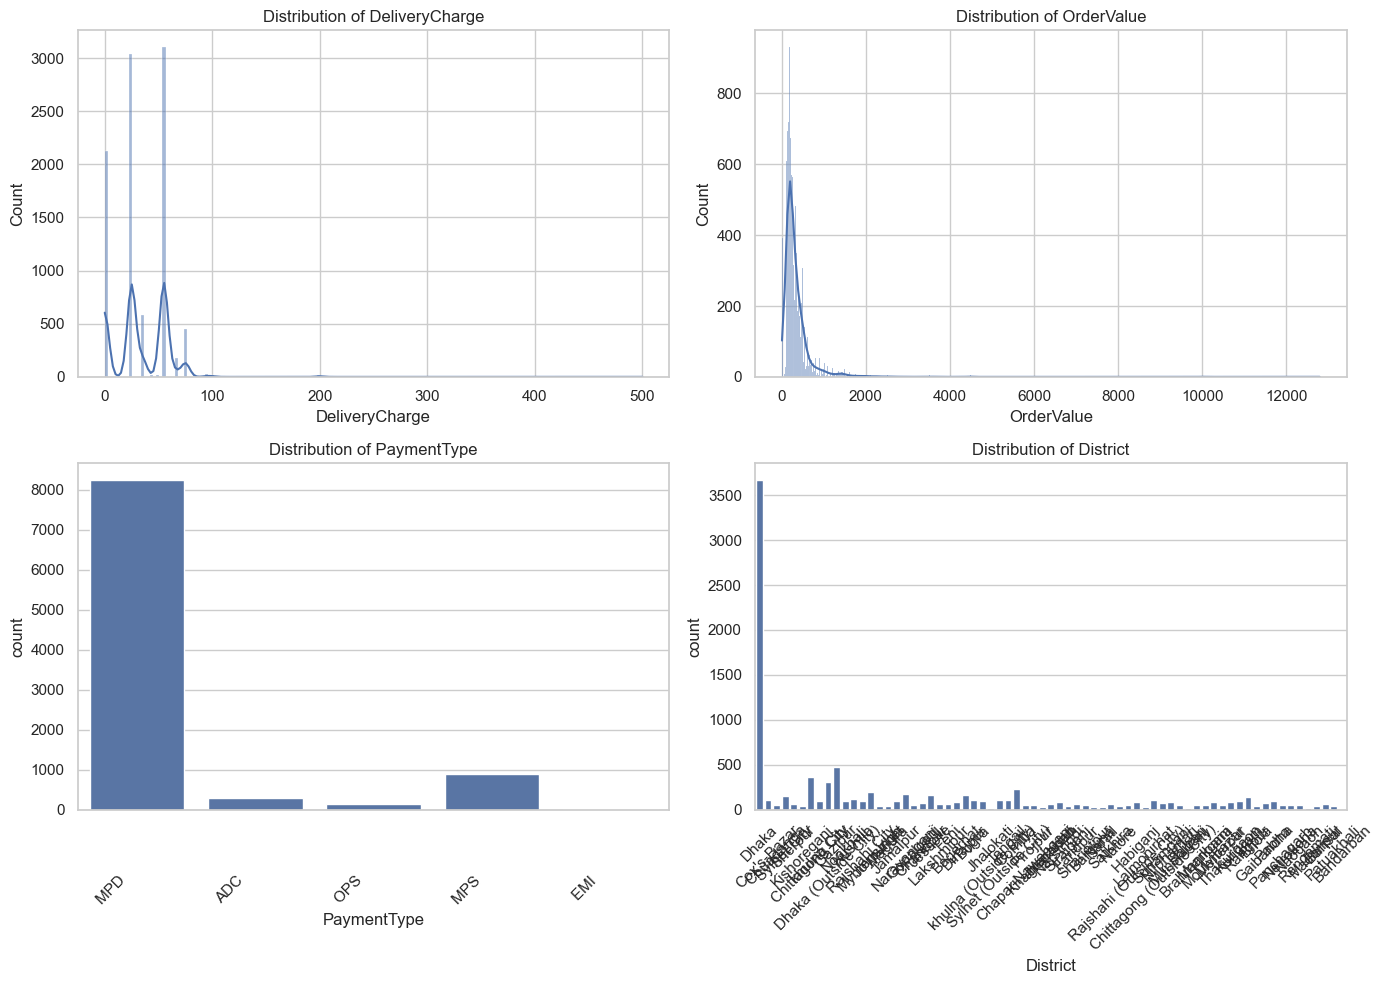

In [ ]:
# Select columns
numerical_cols = ["DeliveryCharge", "OrderValue"]
categorical_cols = df.select_dtypes(include='object').columns[:2]

# Plot
plt.figure(figsize=(14, 10))

# Numerical distributions
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

# Categorical distributions
for i, col in enumerate(categorical_cols, 3):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

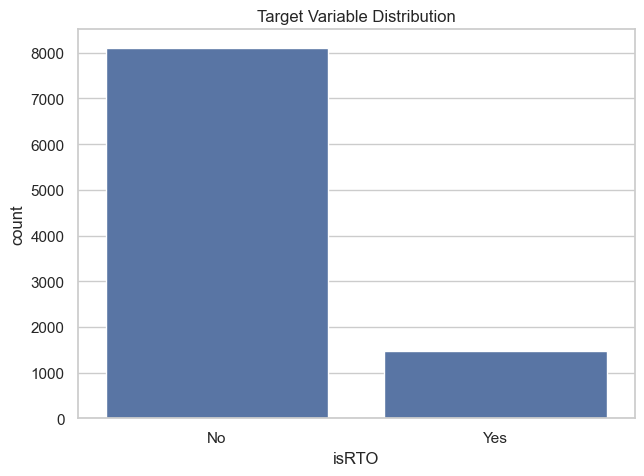

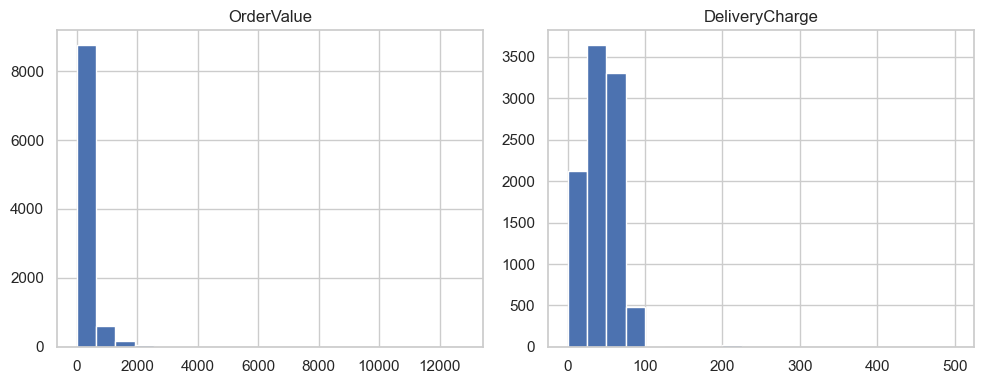

ValueError: Could not interpret value `Payment Type` for `x`. An entry with this name does not appear in `data`.

In [196]:

sns.countplot(x='isRTO', data=df)
plt.title('Target Variable Distribution')
plt.show()


df[['OrderValue', 'DeliveryCharge']].hist(bins=20, figsize=(10, 4))
plt.tight_layout()
plt.show()


sns.countplot(x='Payment Type', data=df)
plt.title('Payment Type Distribution')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Order Source', data=df)
plt.title('Order Source Distribution')
plt.xticks(rotation=45)
plt.show()


numerical_features = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

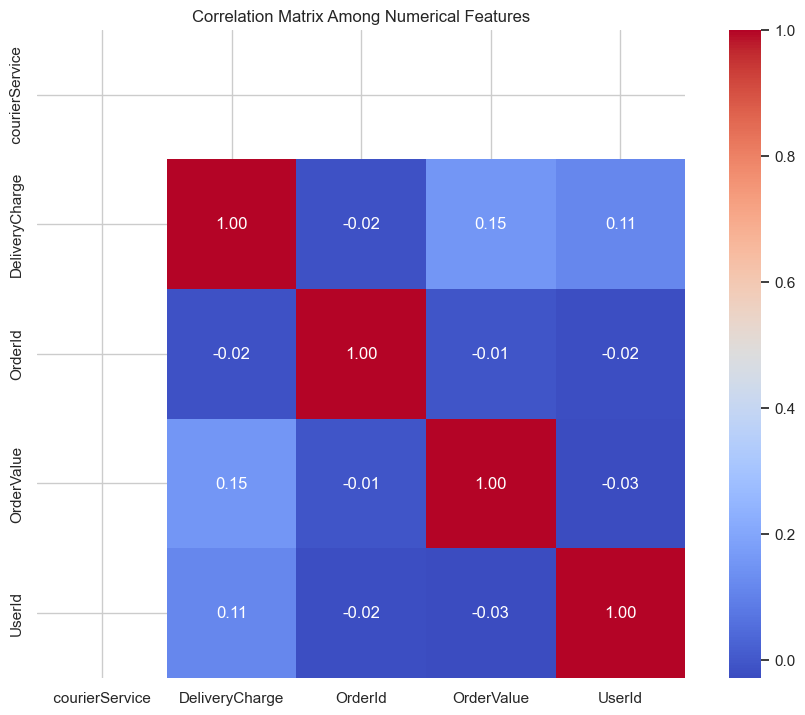

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix and sort it
correlation_matrix = numerical_df.corr().sort_index(axis=0).sort_index(axis=1)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Among Numerical Features")
plt.show()

data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Handle missing values (example: fill with median for numerical, mode for categorical)
for col in df.select_dtypes(include=np.number):
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['OrderValue', 'DeliveryCharge']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Ensure 'isRTO' column exists before splitting
if 'isRTO' in df.columns:
    # Split data
    X = df.drop('isRTO', axis=1)
    y = df['isRTO']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise KeyError("'isRTO' column not found in the DataFrame")


KeyError: "'isRTO' column not found in the DataFrame"

Feature engineering

In [231]:

df['ValuePerCharge'] = df['OrderValue'] / (df['DeliveryCharge'] + 1)


df['HighOrder'] = df['OrderValue'] > df['OrderValue'].median()


corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df.drop(columns=to_drop, inplace=True)


ValueError: could not convert string to float: 'MPD                 '